In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error)
from unidecode import unidecode
import matplotlib.pyplot as plt
from zipfile import ZipFile
import yfinance as yf
import pandas as pd
import numpy as np

## GET SETORIAL DATA

In [2]:
df_setorial = pd.read_csv('../data/b3_setorial.csv', sep=';', encoding='latin')

# SETOR
setor_map = {
    'Petróleo, Gás e Biocombustíveis' : 'petroleo_gas_e_biocombustiveis',
    'Materiais Básicos' : 'materiais_basicos',
    'Bens Industriais' : 'bens_industriais',
    'Consumo não Cíclico' : 'consumo_nao_ciclico',
    'Consumo Cíclico' : 'consumo_ciclico',
    'Saúde' : 'saude',
    'Tecnologia da Informação' : 'tecnologia_da_informacao',
    'Comunicações' : 'comunicacoes',
    'Utilidade Pública' : 'utilidade_publica',
    'Financeiro' : 'financeiro',
    'Outros' : 'outros'    
}
df_setorial['setor'] = df_setorial['setor'].map(setor_map)
setor_dummies = pd.get_dummies(df_setorial.setor, prefix='setor', prefix_sep='.').drop(columns='setor.outros')
df_setorial = pd.concat([df_setorial, setor_dummies], axis=1).drop(columns='setor')

# SUBSETOR
subseto_map = {
    'Petróleo, Gás e Biocombustíveis' : 'petroleo_gas_e_biocombustiveis',
    'Mineração' : 'mineracao',
    'Siderurgia e Metalurgia' : 'siderurgia_e_metalurgia',
    'Químicos' : 'quimicos',
    'Madeira e Papel' : 'madeira_e_papel',
    'Embalagens' : 'embalagens',
    'Materiais Diversos' : 'materiais_diversos',
    'Construção e Engenharia' : 'construcao_e_engenharia',
    'Material de Transporte' : 'material_de_transporte',
    'Máquinas e Equipamentos' : 'maquinas_e_equipamentos',
    'Transporte' : 'transporte',
    'Serviços Diversos' : 'servicos_diversos',
    'Comércio' : 'comercio',
    'Agropecuária' : 'agropecuaria',
    'Alimentos Processados' : 'alimentos_processados',
    'Bebidas' : 'bebidas',
    'Produtos de Uso Pessoal e de Limpeza' : 'produtos_de_uso_pessoal_e_de_limpeza',
    'Comércio e Distribuição' : 'comercio_e_distribuicao',
    'Construção Civil' : 'construcao_civil',
    'Tecidos, Vestuário e Calçados' : 'tecidos_vestuario_e_calcados',
    'Utilidades Domésticas' : 'utilidades_domesticas',
    'Automóveis e Motocicletas' : 'automoveis_e_motocicletas',
    'Hoteis e Restaurantes' : 'hoteis_e_restaurantes',
    'Viagens e Lazer' : 'viagens_e_lazer',
    'Diversos' : 'diversos',
    'Medicamentos e Outros Produtos' : 'medicamentos_e_outros_produtos',
    'Serviços Médico - Hospitalares, Análises e Diagnósticos' : 'servicos_medico_-_hospitalares_analises_e_diagnosticos',
    'Equipamentos' : 'equipamentos',
    'Computadores e Equipamentos' : 'computadores_e_equipamentos',
    'Programas e Serviços' : 'programas_e_servicos',
    'Telecomunicações' : 'telecomunicacoes',
    'Mídia' : 'midia',
    'Energia Elétrica' : 'energia_eletrica',
    'Água e Saneamento' : 'agua_e_saneamento',
    'Gás' : 'gas',
    'Intermediários Financeiros' : 'intermediarios_financeiros',
    'Securitizadoras de Recebíveis' : 'securitizadoras_de_recebiveis',
    'Serviços Financeiros Diversos' : 'servicos_financeiros_diversos',
    'Previdência e Seguros' : 'previdencia_e_seguros',
    'Exploração de Imóveis' : 'exploracao_de_imoveis',
    'Holdings Diversificadas' : 'holdings_diversificadas',
    'Outros Títulos' : 'outros_titulos',
    'Outros' : 'outros'
}

df_setorial['subsetor'] = df_setorial['subsetor'].map(setor_map)
setor_dummies = pd.get_dummies(df_setorial.subsetor, prefix='subsetor', prefix_sep='.').drop(columns='subsetor.outros')
df_setorial = pd.concat([df_setorial, setor_dummies], axis=1).drop(columns='subsetor')

# SEGMENTO
segmento_map = {
    'Exploração, Refino e Distribuição' : 'exploracao_refino_e_distribuicao',
    'Equipamentos e Serviços' : 'equipamentos_e_servicos',
    'Minerais Metálicos' : 'minerais_metalicos',
    'Siderurgia' : 'siderurgia',
    'Artefatos de Ferro e Aço' : 'artefatos_de_ferro_e_aco',
    'Artefatos de Cobre' : 'artefatos_de_cobre',
    'Petroquímicos' : 'petroquimicos',
    'Fertilizantes e Defensivos' : 'fertilizantes_e_defensivos',
    'Químicos Diversos' : 'quimicos_diversos',
    'Madeira' : 'madeira',
    'Papel e Celulose' : 'papel_e_celulose',
    'Embalagens' : 'embalagens',
    'Materiais Diversos' : 'materiais_diversos',
    'Produtos para Construção' : 'produtos_para_construcao',
    'Construção Pesada' : 'construcao_pesada',
    'Engenharia Consultiva' : 'engenharia_consultiva',
    'Serviços Diversos' : 'servicos_diversos',
    'Material Aeronáutico e de Defesa' : 'material_aeronautico_e_de_defesa',
    'Material Rodoviário' : 'material_rodoviario',
    'Motores, Compressores e Outros' : 'motores_compressores_e_outros',
    'Máq. e Equip. Industriais' : 'maq._e_equip._industriais',
    'Máq. e Equip. Construção e Agrícolas' : 'maq._e_equip._construcao_e_agricolas',
    'Armas e Munições' : 'armas_e_municoes',
    'Transporte Aéreo' : 'transporte_aereo',
    'Transporte Ferroviário' : 'transporte_ferroviario',
    'Transporte Hidroviário' : 'transporte_hidroviario',
    'Transporte Rodoviário' : 'transporte_rodoviario',
    'Exploração de Rodovias' : 'exploracao_de_rodovias',
    'Serviços de Apoio e Armazenagem' : 'servicos_de_apoio_e_armazenagem',
    'Material de Transporte' : 'material_de_transporte',
    'Agricultura' : 'agricultura',
    'Açucar e Alcool' : 'acucar_e_alcool',
    'Carnes e Derivados' : 'carnes_e_derivados',
    'Alimentos Diversos' : 'alimentos_diversos',
    'Cervejas e Refrigerantes' : 'cervejas_e_refrigerantes',
    'Produtos de Uso Pessoal' : 'produtos_de_uso_pessoal',
    'Produtos de Limpeza' : 'produtos_de_limpeza',
    'Alimentos' : 'alimentos',
    'Incorporações' : 'incorporacoes',
    'Fios e Tecidos' : 'fios_e_tecidos',
    'Vestuário' : 'vestuario',
    'Calçados' : 'calcados',
    'Acessórios' : 'acessorios',
    'Eletrodomésticos' : 'eletrodomesticos',
    'Móveis' : 'moveis',
    'Utensílios Domésticos' : 'utensilios_domesticos',
    'Automóveis e Motocicletas' : 'automoveis_e_motocicletas',
    'Hotelaria' : 'hotelaria',
    'Restaurante e Similares' : 'restaurante_e_similares',
    'Bicicletas' : 'bicicletas',
    'Brinquedos e Jogos' : 'brinquedos_e_jogos',
    'Produção de Eventos e Shows' : 'producao_de_eventos_e_shows',
    'Viagens e Turismo' : 'viagens_e_turismo',
    'Atividades Esportivas' : 'atividades_esportivas',
    'Serviços Educacionais' : 'servicos_educacionais',
    'Aluguel de carros' : 'aluguel_de_carros',
    'Programas de Fidelização' : 'programas_de_fidelizacao',
    'Tecidos, Vestuário e Calçados' : 'tecidos_vestuario_e_calcados',
    'Produtos Diversos' : 'produtos_diversos',
    'Medicamentos e Outros Produtos' : 'medicamentos_e_outros_produtos',
    'Serviços Médico - Hospitalares, Análises e Diagnósticos' : 'servicos_medico_-_hospitalares_analises_e_diagnosticos',
    'Equipamentos' : 'equipamentos',
    'Computadores e Equipamentos' : 'computadores_e_equipamentos',
    'Programas e Serviços' : 'programas_e_servicos',
    'Telecomunicações' : 'telecomunicacoes',
    'Produção e Difusão de Filmes e Programas' : 'producao_e_difusao_de_filmes_e_programas',
    'Energia Elétrica' : 'energia_eletrica',
    'Água e Saneamento' : 'agua_e_saneamento',
    'Gás' : 'gas',
    'Bancos' : 'bancos',
    'Soc. Crédito e Financiamento' : 'soc._credito_e_financiamento',
    'Soc. Arrendamento Mercantil' : 'soc._arrendamento_mercantil',
    'Securitizadoras de Recebíveis' : 'securitizadoras_de_recebiveis',
    'Gestão de Recursos e Investimentos' : 'gestao_de_recursos_e_investimentos',
    'Serviços Financeiros Diversos' : 'servicos_financeiros_diversos',
    'Seguradoras' : 'seguradoras',
    'Corretoras de Seguros' : 'corretoras_de_seguros',
    'Exploração de Imóveis' : 'exploracao_de_imoveis',
    'Intermediação Imobiliária' : 'intermediacao_imobiliaria',
    'Holdings Diversificadas' : 'holdings_diversificadas',
    'Outros Títulos' : 'outros_titulos',
    'Outros' : 'outros'   
}

df_setorial['segmento'] = df_setorial['segmento'].map(setor_map)
setor_dummies = pd.get_dummies(df_setorial.segmento, prefix='segmento', prefix_sep='.').drop(columns='segmento.outros')
df_setorial = pd.concat([df_setorial, setor_dummies], axis=1).drop(columns='segmento')

df_setorial.drop(columns='listagem_segmento', inplace=True)


## API Download data

In [3]:
tickers = ['COPH34', 'RNEW11F', 'AALR3', 'AALR3F', 'AAPL34', 'AAPL34F', 'ABTT34', 'ABTT34F', 'AERI3', 'AFLT3', 'AFLT3F', 'AGRO3', 'AGRO3F', 'AIRB34', 'ALPA3F', 'ALPA4F', 'ALPK3', 'ALSO3', 'ALUP11', 'ALUP11F', 'ALUP3', 'ALUP3F', 'ALUP4', 'ALUP4F', 'AMAR3', 'AMAR3F', 'AMBP3', 'AMZO34F', 'ANIM3F', 'APER3', 'APER3F', 'ARMT34', 'ARMT34F', 'ARZZ3F', 'ATTB34', 'ATTB34F', 'AVLL3', 'AVON34', 'AVON34F', 'AXPB34', 'AXPB34F', 'BALM3', 'BALM3F', 'BALM4', 'BALM4F', 'BBAS11', 'BBAS12', 'BBAS3', 'BBAS3F', 'BBDC3', 'BBDC4', 'BBDC4F', 'BBRK3', 'BBRK3F', 'BBSE3', 'BDLL3F', 'BDLL4F', 'BEEF11', 'BEEF3', 'BEEF3F', 'BIDI11', 'BIDI3', 'BIDI4', 'BIOM3', 'BIOM3F', 'BMGB11', 'BMGB4', 'BMIN3', 'BMLC11', 'BMOB3', 'BMYB34', 'BMYB34F', 'BOAC34', 'BOAC34F', 'BOAS3', 'BOEI34F', 'BPAN4', 'BPAR3', 'BPAR3F', 'BRAP3', 'BRAP3F', 'BRAP4', 'BRAP4F', 'BRDT3', 'BRFS3', 'BRK.B', 'BRKM3', 'BRKM5', 'BRKM5F', 'BRKM6', 'BRML3', 'BRPR3', 'BRPR3F', 'BRSR3', 'BRSR3F', 'BRSR5', 'BRSR5F', 'BRSR6', 'BRSR6F', 'BSEV3', 'BSEV3F', 'BSLI3', 'BSLI3F', 'BSLI4', 'BSLI4F', 'BTTL3', 'BTTL3F', 'CAML3', 'CAML3F', 'CARD3', 'CARD3F', 'CASH3', 'CASN3', 'CASN3F', 'CASN4', 'CASN4F', 'CATP34F', 'CEAB3', 'CEBR3', 'CEBR3F', 'CEBR5', 'CEBR5F', 'CEBR6', 'CEBR6F', 'CEDO3F', 'CEDO4F', 'CEED3', 'CEED3F', 'CEED4', 'CEED4F', 'CEGR3', 'CEGR3F', 'CEPE3', 'CEPE3F', 'CEPE5', 'CEPE5F', 'CEPE6', 'CEPE6F', 'CESP3', 'CESP3F', 'CESP5', 'CESP6', 'CGAS3', 'CGAS3F', 'CGAS5', 'CGAS5F', 'CGRA3', 'CGRA3F', 'CGRA4', 'CGRA4F', 'CHVX34','CHVX34F', 'CJCT11', 'CLSC3', 'CLSC3F', 'CLSC4', 'CLSC4F', 'CMCS34F', 'CMCSA', 'CMIG3', 'CMIG3F', 'CMIG4', 'CMIN3', 'COCA34', 'COCA34F', 'COCE3', 'COCE3F', 'COCE5', 'COCE5F', 'COCE6', 'COCE6F', 'COGN3', 'COGN3F', 'COLG34', 'COLG34F', 'CONX3', 'CPFE3', 'CPFE3F', 'CPLE3', 'CPLE3F', 'CPLE5', 'CPLE5F', 'CPLE6', 'CPLE6F', 'CPRE3', 'CPRE3F', 'CRFB3', 'CRFB3F', 'CSCO34', 'CSCO34F', 'CSED3', 'CSNA3', 'CSNA3F', 'CTGP34', 'CTGP34F', 'CTKA3', 'CTKA3F', 'CTKA4', 'CTKA4F', 'CTNM3', 'CTNM3F', 'CTNM4', 'CTNM4F', 'CURY3', 'CVCB3', 'CYRE3', 'DEVA11', 'DIRR3', 'DIRR3F', 'DMMO11', 'DMMO3', 'DMMO3F', 'DMVF3', 'EBAY34', 'EBAY34F', 'EEEL3', 'EEEL3F', 'EEEL4', 'EEEL4F', 'EGIE3', 'EGIE3F', 'ELMD3', 'ENAT3', 'ENJU3', 'ESPA3', 'ESTR3', 'ESTR3F', 'ESTR4', 'ESTR4F', 'ETER3F', 'EUCA3', 'EUCA3F', 'EUCA4', 'EUCA4F', 'EVEN3', 'EVEN3F', 'EXXO34', 'EXXO34F', 'EZTC3', 'EZTC3F', 'FCXO34', 'FCXO34F', 'FDMO34', 'FDMO34F', 'FDXB34F', 'FESA3', 'FESA3F', 'FESA4', 'FESA4F', 'FLRY3', 'FRAS3F', 'GBIO33', 'GBIO33F', 'GEOO34', 'GEOO34F', 'GEPA3', 'GEPA3F', 'GEPA4', 'GEPA4F', 'GFSA3', 'GFSA3F', 'GMAT3', 'GOAU4', 'GOGL35', 'GOL4F', 'GOLL11', 'GOOGL', 'GRND3', 'GRND3F', 'GSGI34', 'GSGI34F', 'GSHP3', 'GSHP3F', 'HALI34', 'HALI34F', 'HBOR3', 'HBOR3F', 'HBRE3', 'HBRE3F', 'HBSA3', 'HGTX3F', 'HOME34', 'HOME34F', 'HONB34', 'HONB34F', 'HOOT4', 'HPQB34', 'HPQB34F', 'HYPE3', 'IBMB34', 'IBMB34F', 'IGBR3', 'IGBR3F', 'IGTA3', 'INEP3F', 'INEP4F', 'INTB3', 'IRBR3', 'ITLC34', 'ITLC34F', 'ITSA3F', 'ITSA4', 'ITSA4F', 'ITUB3', 'ITUB3F', 'ITUB4', 'ITUB4F', 'JALL3', 'JBSS3', 'JBSS3F', 'JHSF3', 'JHSF3F', 'JNJB34', 'JNJB34F', 'JPMC34', 'JPMC34F', 'JSLG3', 'KLBN11', 'KLBN11F', 'KLBN3', 'KLBN3F', 'KLBN4', 'KLBN4F', 'LAME3', 'LAME3F', 'LAME4', 'LAME4F', 'LAVV3', 'LCAM3', 'LCAM3F', 'LEVE3', 'LEVE3F', 'LINX3', 'LINX3F', 'LJQQ3', 'LLIS3', 'LLIS3F', 'LMTB34F', 'LOGG3', 'LPSB3', 'LPSB3F', 'LREN3', 'LREN3F', 'LUPA3F', 'LWSA3', 'MBLY3', 'MCDC34', 'MCDC34F', 'MDIA3', 'MDIA3F', 'MDNE3', 'MELK3', 'MERC4', 'MFAI11', 'MGLU3', 'MGLU3F', 'MMMC34', 'MMMC34F', 'MMXM11', 'MMXM11F', 'MMXM3', 'MMXM3F', 'MNDL3', 'MNDL3F', 'MOSI3', 'MOVI3', 'MOVI3F', 'MRCK34', 'MRCK34F', 'MRFG3', 'MRFG3F', 'MRVE3', 'MRVE3F', 'MSBR34', 'MSBR34F', 'MSCD34', 'MSCD34F', 'MSFT34', 'MSFT34F', 'MTRE3', 'MULT3', 'MULT3F', 'MYPK3', 'MYPK3F', 'NEMO3', 'NEMO5', 'NEMO5F', 'NEMO6', 'NEOE3', 'NFLX34', 'NFLX34F', 'NGRD3', 'NIKE34', 'NIKE34F', 'NTCO3', 'NTCO3F', 'ODPV3', 'ODPV3F', 'OFSA3', 'OFSA3F', 'OIBR4', 'OIBR4F', 'OPCT3', 'ORCL34', 'ORCL34F', 'ORVR3', 'OSXB3', 'OSXB3F', 'PAGS34', 'PARD3', 'PASS3', 'PCAR3', 'PCAR3F', 'PCAR4F', 'PDGR3', 'PDGR3F', 'PEPB34', 'PEPB34F', 'PETR3', 'PETR3F', 'PETR4', 'PETR4F', 'PETZ3', 'PFIZ34', 'PFIZ34F', 'PGCO34', 'PGCO34F', 'PGMN3', 'PLPL3', 'PMAM3', 'PMAM3F', 'PNVL3', 'PNVL3F', 'PNVL4', 'PNVL4F', 'POSI3', 'POSI3F', 'POWE3', 'PRIO3', 'PRIO3F', 'PSSA3', 'PSSA3F', 'PTBL3F', 'QCOM34', 'QCOM34F', 'QUAL3', 'QUAL3F', 'RADL3', 'RADL3F', 'RANI3F', 'RANI4', 'RANI4F', 'RAPT3F', 'RDNI3', 'RDNI3F', 'RECR11', 'RENT3', 'RENT3F', 'RIVA3', 'RNEW11', 'RNEW3', 'RNEW4', 'RNEW4F', 'RPMG3', 'RPMG3F', 'RRRP3', 'RSID3', 'RSID3F', 'SANB11', 'SANB11F', 'SANB3', 'SANB3F', 'SANB4', 'SANB4F', 'SAPR11', 'SAPR11F', 'SAPR3', 'SAPR3F', 'SAPR4', 'SAPR4F', 'SBSP3', 'SBSP3F', 'SBUB34', 'SBUB34F', 'SCAR3', 'SCAR3F', 'SEER3', 'SEQL3', 'SHUL4F', 'SIMH3F', 'SLBG34', 'SLBG34F', 'SLED3', 'SLED3F', 'SLED4', 'SLED4F', 'SMLS3', 'SMLS3F', 'SMTO3', 'SMTO3F', 'SOMA3', 'STBP3F', 'STZ.B', 'SUZB3', 'SUZB3F', 'TAEE11', 'TAEE3', 'TAEE4', 'TASA3F', 'TASA4F', 'TCSA3', 'TCSA3F', 'TELB3', 'TELB3F', 'TELB4', 'TELB4F', 'TFCO4', 'TIET11', 'TIET11F', 'TIET3', 'TIET3F', 'TIET4', 'TIET4F', 'TIMS3', 'TIMS3F', 'TOTS3', 'TOTS3F', 'TPIS3F', 'TRPL3', 'TRPL3F', 'TRPL4', 'TRPL4F', 'UGPA3', 'UGPA3F', 'UNIP3', 'UNIP3F', 'UNIP5', 'UNIP5F', 'UNIP6', 'UNIP6F', 'UPSS34F', 'URPR11', 'VALE5', 'VAMO3', 'VERZ34', 'VERZ34F', 'VISA34', 'VISA34F', 'VIVA3', 'VIVT3', 'VIVT3F', 'VIVT4', 'VIVT4F', 'VLID3F', 'VVAR3', 'WALM34', 'WALM34F', 'WEST3', 'WFCO34', 'WFCO34F', 'WHRL3', 'WHRL3F', 'WHRL4', 'WHRL4F', 'XRXB34', 'XRXB34F', 'YDUQ3']

In [4]:
for ticker in tickers:
    print(f'---- {ticker} ----')
    df_history = yf.download(tickers=f"{ticker}.SA", period='2y')
    df_history['ticker'] = ticker
    print(df_history.shape)
    if(df_history.shape[0] >= 360):
        df_history.to_parquet(f'history/{ticker.lower()}.parquet')
    else:
        print('Data <- 360 days')
    print()  

---- COPH34 ----
[*********************100%***********************]  1 of 1 completed
(491, 7)

---- RNEW11F ----
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RNEW11F.SA: No data found, symbol may be delisted
(0, 7)
Data <- 360 days

---- AALR3 ----
[*********************100%***********************]  1 of 1 completed
(491, 7)

---- AALR3F ----
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AALR3F.SA: No data found, symbol may be delisted
(0, 7)
Data <- 360 days

---- AAPL34 ----
[*********************100%***********************]  1 of 1 completed
(491, 7)

---- AAPL34F ----
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL34F.SA: No data found for this date range, symbol may be delisted
(0, 7)
Data <- 360 days

---- ABTT34 ----
[*********************100%***********************]  1 of 1 completed
(491, 7)

---- ABTT34F ----
[*********************100%***

## Concat all data

In [91]:
df_list = []
for data in os.listdir('history'):
    df_list.append(pd.read_parquet(f'history/{data}'))
df = pd.concat(df_list)
df = df.reset_index()
df.columns = ['date', 'open','high','low','close','adj_close','volume','ticker']

# O codigo irá servir para o join com df_setor
df['codigo'] = df['ticker'].str.slice(0,4)
df = df[['adj_close','date', 'ticker','codigo']]

df = df.merge(
        df_setorial,
        how='inner',
        left_on='codigo',
        right_on='codigo')

tickers = df['ticker'].unique()

In [92]:
print(f'Unique tickers {len(tickers)}')

ticker_dummies = pd.get_dummies(df.ticker, prefix='ticker', prefix_sep='.')
df = pd.concat([df, ticker_dummies], axis=1)

df = df.sort_values(by=['date'], ascending=True)

df['date'] = df['date'].astype(str)
df['date'] = df['date'].str.replace('-','')
df['date'] = df['date'].astype(int)

df.reset_index(drop=True, inplace=True)

# Movendo a coluna codigo para ultima posicao
df = df.drop(columns=['codigo'])
df_ticker = df.pop('ticker')
df['ticker'] = df_ticker
del df_ticker

df = df.dropna()

Unique tickers 194


---

In [105]:
future = True
days_to_predict = 1
rows_to_predict = len(tickers) * days_to_predict

if future:
    X_train = df.iloc[:,1:-1]
    y_train = df.iloc[:,0]

    X_test = X_train.iloc[-len(tickers):]
    X_test['date'] = 20210304
else:
    X_train = df.iloc[:-rows_to_predict,1:-1]
    y_train = df.iloc[:-rows_to_predict,0]

    X_test = df.iloc[-rows_to_predict:,1:-1]
    y_test = df.iloc[-rows_to_predict:,0]

In [106]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)

In [98]:
df[df['ticker.AALR3'] == 1]

,adj_close,date,setor.bens_industriais,setor.comunicacoes,setor.consumo_ciclico,setor.consumo_nao_ciclico,setor.financeiro,setor.materiais_basicos,setor.petroleo_gas_e_biocombustiveis,setor.saude,...,ticker.UGPA3,ticker.UNIP3,ticker.UNIP5,ticker.UNIP6,ticker.VIVT3,ticker.VVAR3,ticker.WHRL3,ticker.WHRL4,ticker.YDUQ3,ticker
7,15.027434,20190307,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
370,15.314520,20190308,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
521,15.294720,20190311,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
664,15.463012,20190312,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
914,15.690701,20190313,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94188,9.520000,20210225,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
94352,9.010000,20210226,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
94567,9.030000,20210301,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3
94771,9.020000,20210302,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,AALR3


In [109]:
# predicted = pd.read_csv('predict_20210302.csv', sep=';')
# predicted = predicted['predicted']
# predicted = list(predicted)

index = 0
for column in X_test.columns:
    if('ticker' in column):
        print(f'{column} : {round(predicted[index],2)}')
        index = index + 1

ticker.AALR3 : 6.08
ticker.AFLT3 : 7.72
ticker.AGRO3 : 11.26
ticker.ALSO3 : 2.55
ticker.ALUP11 : 33.12
ticker.ALUP3 : 158.6
ticker.ALUP4 : 33.31
ticker.AMAR3 : 29.14
ticker.APER3 : 30.36
ticker.BALM3 : 54.7
ticker.BALM4 : 9.61
ticker.BBAS3 : 20.57
ticker.BBDC3 : 23.1
ticker.BBDC4 : 47.79
ticker.BBRK3 : 10.23
ticker.BBSE3 : 11.19
ticker.BEEF3 : 19.38
ticker.BIDI11 : 11.82
ticker.BIDI3 : 22.81
ticker.BIDI4 : 30.72
ticker.BIOM3 : 18.31
ticker.BMIN3 : 73.32
ticker.BPAN4 : 14.45
ticker.BRAP3 : 6.61
ticker.BRAP4 : 25.63
ticker.BRDT3 : 29.14
ticker.BRFS3 : 30.79
ticker.BRKM3 : 12.42
ticker.BRKM5 : 47.79
ticker.BRKM6 : 9.56
ticker.BRML3 : 16.2
ticker.BRPR3 : 2.46
ticker.BRSR3 : 25.13
ticker.BRSR5 : 14.92
ticker.BRSR6 : 5.18
ticker.BSEV3 : 1.76
ticker.BSLI3 : 7.16
ticker.BSLI4 : 23.8
ticker.BTTL3 : 31.19
ticker.CAML3 : 2.55
ticker.CARD3 : 30.86
ticker.CASN3 : 11.12
ticker.CASN4 : 17.88
ticker.CEBR3 : 25.63
ticker.CEBR5 : 19.9
ticker.CEBR6 : 23.82
ticker.CEED3 : 6.61
ticker.CEED4 : 26.6
ticker.C

In [107]:
print(f'r2_score : {round(r2_score(predicted, y_test),4)}')
print(f'mean_squared_error: {round(mean_squared_error(predicted, y_test, squared=False),4)}')
print(f'mean_absolute_error: {round(mean_absolute_error(predicted, y_test),4)}')

r2_score : -21.5347
mean_squared_error: 123.8178
mean_absolute_error: 37.3342


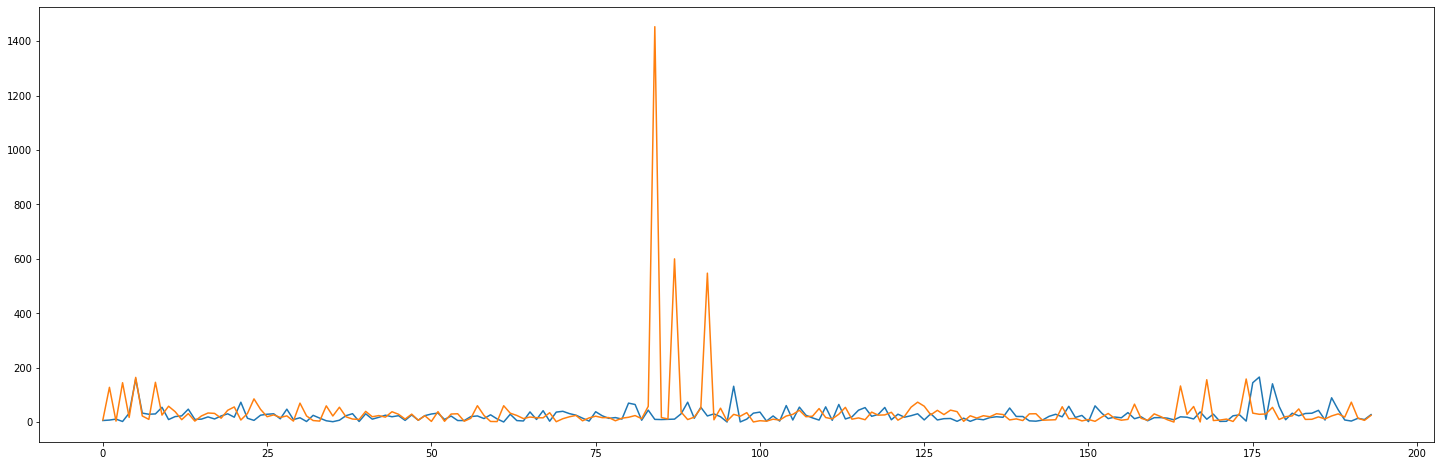

In [108]:
fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(predicted)
ax.plot(np.array(y_test))
plt.show()

In [3]:
selic_data = [
    (2021, 2, 1.57),
    (2021, 1, 1.81),
    (2020, 12, 1.94),
    (2020, 11, 1.81),
    (2020, 10, 1.94),
    (2020, 9, 1.94),
    (2020, 8, 1.94),
    (2020, 7, 2.30),
    (2020, 6, 2.55),
    (2020, 5, 2.92),
    (2020, 4, 3.41),
    (2020, 3, 4.16),
    (2020, 2, 3.54),
    (2020, 1, 4.66),
    (2019, 12, 4.53),
    (2019, 11, 4.66),
    (2019, 10, 5.91),
    (2019, 9, 5.66),
    (2019, 8, 6.17),
    (2019, 7, 7.06),
    (2019, 6, 5.79),
    (2019, 5, 6.68),
    (2019, 4, 6.42),
    (2019, 3, 5.79),
    (2019, 2, 6.04),
    (2019, 1, 6.68),
]
selic_columns = ['year', 'month', 'rate']

In [6]:
import pandas as pd
pd.DataFrame(
    selic_data, columns=selic_columns
)

,year,month,rate
0,2021,2,1.57
1,2021,1,1.81
2,2020,12,1.94
3,2020,11,1.81
4,2020,10,1.94
5,2020,9,1.94
6,2020,8,1.94
7,2020,7,2.30
8,2020,6,2.55
9,2020,5,2.92
